Urinary biomarkers for pancreatic cancer.

Pancreatic cancer is an extremely deadly type of cancer. Once diagnosed, the five-year survival rate is less than 10%. However, if pancreatic cancer is caught early, the odds of surviving are much better. Unfortunately, many cases of pancreatic cancer show no symptoms until the cancer has spread throughout the body. A diagnostic test to identify people with pancreatic cancer could be enormously helpful.

https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer?resource=download

Can a simple urine test detect one of the deadliest cancers?

In [60]:
#Libraries

In [61]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [62]:
# Load and display data

In [64]:
filepath = "/media/sf_SharedFolder/GEO Dataset/Urinary biomarkers for pancreatic cancer/Debernardi et al 2020 data.csv"
biomarkers_df = pd.read_csv(filepath)
biomarkers_df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [65]:
#Age distribution according to diagnosis

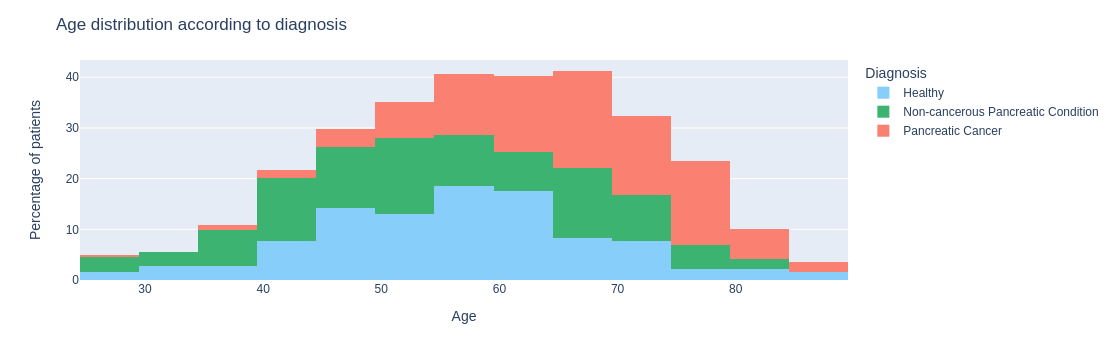

In [66]:
diagnosis_labels = {1: 'Healthy', 2: 'Non-cancerous Pancreatic Condition', 3: 'Pancreatic Cancer'}

color_map = {1: 'LightSkyBlue', 2: 'MediumSeaGreen', 3: 'Salmon'}
fig = px.histogram(biomarkers_df, x='age',
                   color='diagnosis',
                   color_discrete_map=color_map,  
                   labels={'diagnosis':'Diagnosis', 'age':'Age'},
                   category_orders={'diagnosis': [1, 2, 3]}, 
                   histnorm='percent', 
                   nbins=30, 
                   )
fig.for_each_trace(lambda t: t.update(name=diagnosis_labels[int(t.name)]))

fig.update_layout(title='Age distribution according to diagnosis',
                  xaxis_title='Age',
                  yaxis_title='Percentage of patients',
                  legend_title='Diagnosis',
                  )
fig.show()

In [67]:
# Remove columns that will not be used 

In [68]:
biomarkers_df.drop(['sample_id', 'patient_cohort', 'sample_origin', 'stage', 'benign_sample_diagnosis'], axis=1, inplace=True)

In [69]:
#Inserting the average for missing values (not always the best)

In [70]:
imputer = SimpleImputer(strategy='mean')
biomarkers_df[['plasma_CA19_9', 'REG1A']] = imputer.fit_transform(biomarkers_df[['plasma_CA19_9', 'REG1A']])

In [71]:
#Coding of the categorical variable 'sex'

In [72]:
biomarkers_df['sex'] = biomarkers_df['sex'].map({'M': 0, 'F': 1})

In [73]:
biomarkers_df['diagnosis'].replace({1: 0, 2: 0, 3:1}, inplace=True) # I want to predict if patient has cancer or not -> 0 -> without cancer, 1 -> with cancer
set(biomarkers_df['diagnosis'].values)

{0, 1}

In [74]:
#Is dataset balanced?

In [75]:
biomarkers_df['diagnosis'].value_counts()

diagnosis
0    391
1    199
Name: count, dtype: int64

In [76]:
#Data normalization (mean = 0, std = 1)

In [77]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(biomarkers_df.drop(['diagnosis', 'sex'], axis=1))
bm_normalized_df = pd.DataFrame(scaled_features, columns=biomarkers_df.drop(['diagnosis', 'sex'], axis=1).columns)
bm_normalized_df

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,-1.991056,-3.436293e-01,1.529927,-0.631661,-0.299975,0.055876,4.959085e-01
1,1.673512,-6.082196e-17,0.183680,-0.298597,-0.088256,-0.384680,-4.772248e-01
2,-0.616843,-3.461438e-01,-0.117454,-0.849256,-0.047976,-0.135425,-1.070368e-16
3,0.146609,-3.456088e-01,-0.241451,-0.890812,-0.261065,-0.450584,-1.070368e-16
4,0.222954,-3.450738e-01,-1.003143,-0.891378,-0.235767,-0.551475,-1.070368e-16
...,...,...,...,...,...,...,...
585,0.681025,-6.082196e-17,-0.524871,1.162636,0.226755,-0.071998,-1.070368e-16
586,0.910060,-6.082196e-17,0.006542,1.536048,-0.483726,-0.348568,-1.070368e-16
587,0.299299,-6.082196e-17,0.803662,1.342066,0.907324,-0.060005,-1.070368e-16
588,1.215441,-6.082196e-17,0.750521,1.496923,0.480141,0.123466,-1.070368e-16


In [78]:
#Adding sex column back (no need to normalize sex -> 1 or 0)

In [79]:
bm_normalized_df['sex'] = biomarkers_df['sex'].reset_index(drop=True) #Reset index to avoid problems with index mismatch

In [80]:
#Adding the diagnosis column back to the DataFrame ensures that we have a complete dataset that includes both the scaled features and their corresponding labels. We can easily divide the data set into training and testing parts, maintaining the appropriate correlation between the features and the target variable.

In [81]:
bm_normalized_df['diagnosis'] = biomarkers_df['diagnosis'].reset_index(drop=True)
bm_normalized_df

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,sex,diagnosis
0,-1.991056,-3.436293e-01,1.529927,-0.631661,-0.299975,0.055876,4.959085e-01,1,0
1,1.673512,-6.082196e-17,0.183680,-0.298597,-0.088256,-0.384680,-4.772248e-01,1,0
2,-0.616843,-3.461438e-01,-0.117454,-0.849256,-0.047976,-0.135425,-1.070368e-16,0,0
3,0.146609,-3.456088e-01,-0.241451,-0.890812,-0.261065,-0.450584,-1.070368e-16,0,0
4,0.222954,-3.450738e-01,-1.003143,-0.891378,-0.235767,-0.551475,-1.070368e-16,0,0
...,...,...,...,...,...,...,...,...,...
585,0.681025,-6.082196e-17,-0.524871,1.162636,0.226755,-0.071998,-1.070368e-16,0,1
586,0.910060,-6.082196e-17,0.006542,1.536048,-0.483726,-0.348568,-1.070368e-16,1,1
587,0.299299,-6.082196e-17,0.803662,1.342066,0.907324,-0.060005,-1.070368e-16,0,1
588,1.215441,-6.082196e-17,0.750521,1.496923,0.480141,0.123466,-1.070368e-16,1,1


In [82]:
#Division of data into training and test sets

In [83]:
X = bm_normalized_df.drop('diagnosis', axis=1)
y = bm_normalized_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
#Construction of a prediction model

In [85]:
model = RandomForestClassifier(n_estimators=100, random_state=10)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [86]:
#Model evaluation

In [87]:
f'Model_accuracy: {accuracy:.2f}'

'Model_accuracy: 1.00'

In [88]:
accuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        80
           1       0.76      0.82      0.78        38

    accuracy                           0.86       118
   macro avg       0.83      0.85      0.84       118
weighted avg       0.86      0.86      0.86       118



In [89]:
len(y_test)

118

In [90]:
# Comparing predictions to baseline

In [91]:
import random
baseline_pred = [0]*59 + [1]*59
random.shuffle(baseline_pred)
print(classification_report(y_test, baseline_pred))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56        80
           1       0.31      0.47      0.37        38

    accuracy                           0.48       118
   macro avg       0.48      0.48      0.47       118
weighted avg       0.55      0.48      0.50       118



In [92]:
import random
baseline_pred = [0]*80 + [1]*38
random.shuffle(baseline_pred)
print(classification_report(y_test, baseline_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        80
           1       0.37      0.37      0.37        38

    accuracy                           0.59       118
   macro avg       0.53      0.53      0.53       118
weighted avg       0.59      0.59      0.59       118



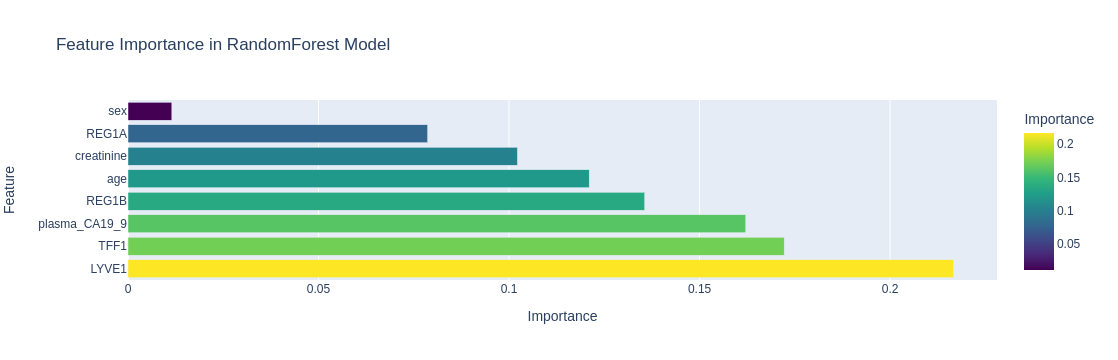

In [93]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=False)

fig = px.bar(features_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance in RandomForest Model',
             labels={'Feature': 'Feature', 'Importance': 'Importance'},
             color='Importance',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

In [94]:
# Confusion matrix

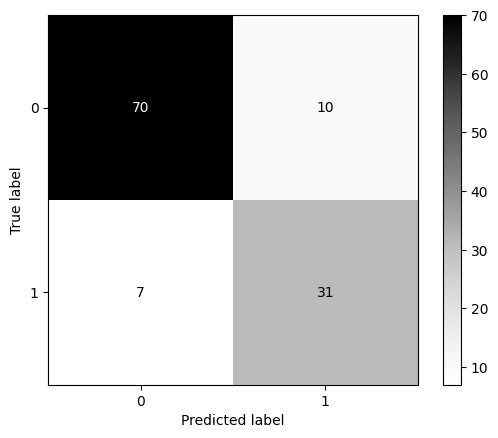

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Grays')
plt.show()

The model presented predicts which markers from those presented can have the greatest impact on detecting pancreatic cancer in patients. Creatinine may be the most relevant in this type of diagnosis but an extension of the model is needed to verify this.  